In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

In [18]:
data=pd.read_csv("C:\Infosys Springboard\Data Sets\AirPassengers.csv")

In [19]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [20]:
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)

C:\Users\bhask\AppData\Local\Temp\ipykernel_23108\2759045271.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)


In [21]:
IndexData=data.set_index(['Month'])

In [22]:
from datetime import datetime
IndexData.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


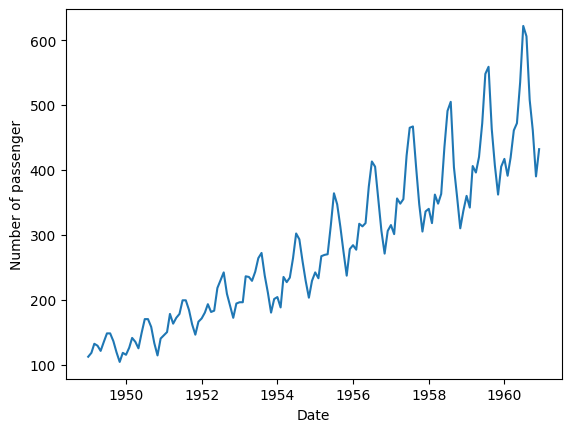

In [23]:
plt.xlabel('Date')
plt.ylabel('Number of passenger')
plt.plot(IndexData)

In [24]:
rolmean=IndexData.rolling(window=12).mean()
rolstd=IndexData.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


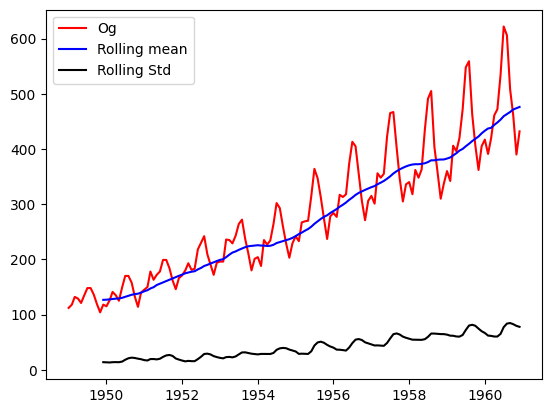

In [25]:
#rolling stat
orginal=plt.plot(IndexData, color='red', label ='Og')
mean=plt.plot(rolmean, color='blue', label="Rolling mean")
std=plt.plot(rolstd, color='black', label="Rolling Std")
plt.legend(loc='best')
plt.show()
# we use # conclude the data is not stationary

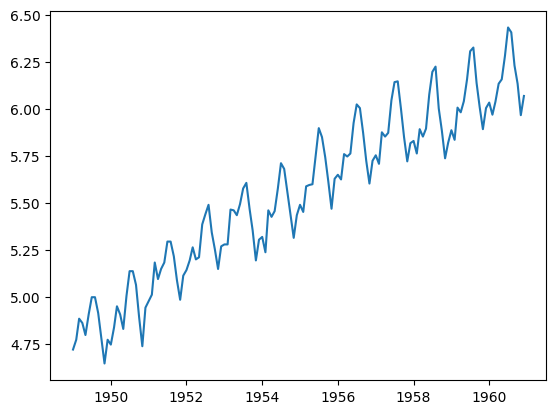

In [26]:
# we use the log
IndexData_logScale=np.log(IndexData)
plt.plot(IndexData_logScale)

In [27]:
Movingavg= IndexData_logScale.rolling(window=12).mean()
movingstd= IndexData_logScale.rolling(window=12).mean()

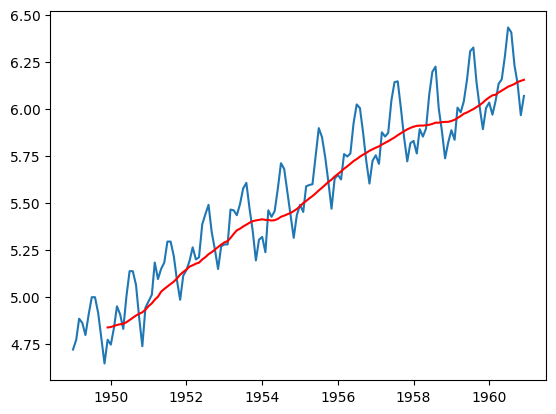

In [28]:
plt.plot(IndexData_logScale)
plt.plot(Movingavg, color='red')

# mean is not stationary as it moves with time

In [29]:
# for getting time series as stationary
dataset_Log_minus_moving_avg= IndexData_logScale-Movingavg
dataset_Log_minus_moving_avg.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [35]:
# rempove nan
dataset_Log_minus_moving_avg.dropna(inplace=True)
dataset_Log_minus_moving_avg.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


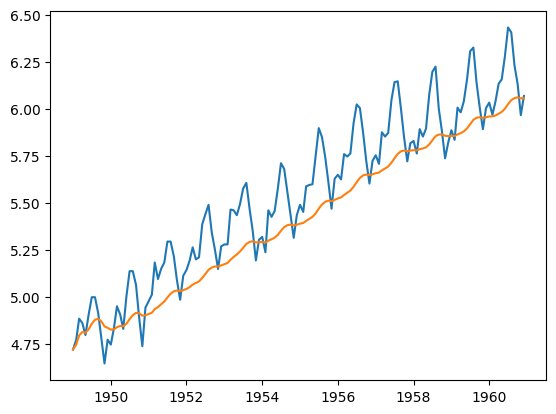

In [31]:
exponential_decay_weighted_avg=IndexData_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(IndexData_logScale)
plt.plot(exponential_decay_weighted_avg)

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(IndexData_logScale)
trend= decomposition.trend
seasonal= decomposition.seasonal
residual= decomposition.resid

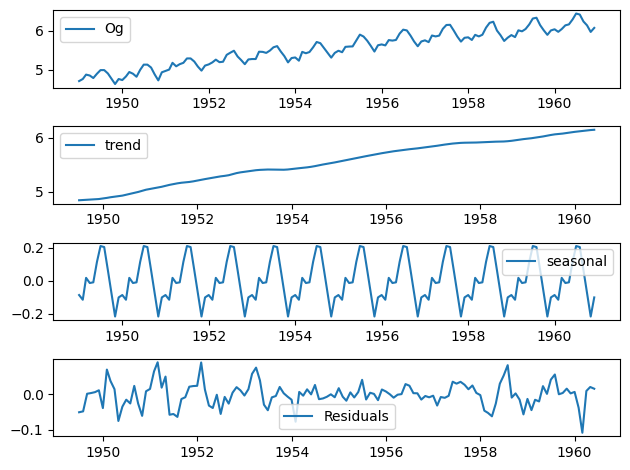

In [33]:
plt.subplot(411)
plt.plot(IndexData_logScale, label='Og')
plt.legend(loc='best')
plt.subplot(412)

plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)

plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)

plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\bhask\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhask\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhask\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


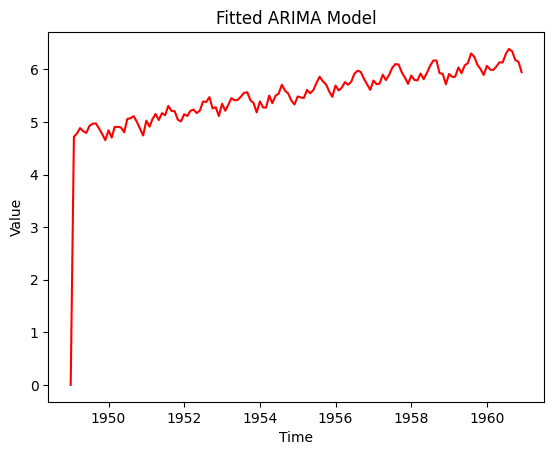

In [34]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

model = ARIMA(IndexData_logScale, order=(2, 1, 2))
results_AR = model.fit()

fitted_values_df = results_AR.fittedvalues.to_frame(name='Fitted Values')

plt.plot(IndexData_logScale.index, fitted_values_df['Fitted Values'], color='red')
plt.title('Fitted ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Value')
rss = ((fitted_values_df['Fitted Values'] - IndexData_logScale)**2).sum()
plt.show()